# Import Packages

[LaTeX Editor](https://latex.codecogs.com/eqneditor/editor.php)

In [1]:
# Run cell ini dulu!!!

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def showGraph(result, range):
    x = np.arange(result-range, result+range, 0.01)
    y = f(x)
    y1 = 0
    plt.clf()
    plt.plot(x, y)
    plt.plot(x, 0/x)
    plt.grid()
    plt.show()

# Bisection Method

$x_{mid} = \frac{x_{low}+x_{up}}{2}$

$|\epsilon_{a}| = |\frac{x_{mid}^{new}-x_{mid}^{old}}{x_{mid}^{new}}| \cdot 100\%$

1.185546875 



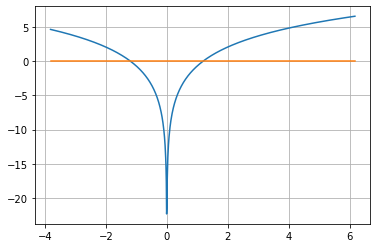

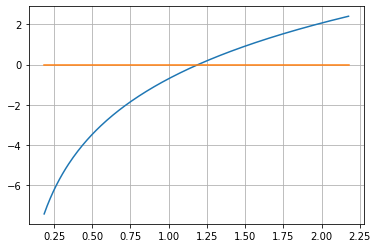

       xlow       xup      xmid       rae   f(xlow)   f(xmid)
0  0.500000  2.000000  1.250000           -3.472589  0.192574
1  0.500000  1.250000  0.875000  0.428571 -3.472589 -1.234126
2  0.875000  1.250000  1.062500  0.176471 -1.234126 -0.457502
3  1.062500  1.250000  1.156250  0.081081 -0.457502 -0.119272
4  1.156250  1.250000  1.203125  0.038961 -0.119272  0.039689
5  1.156250  1.203125  1.179688  0.019868 -0.119272 -0.039002
6  1.179688  1.203125  1.191406  0.009836 -0.039002  0.000537
7  1.179688  1.191406  1.185547  0.004942 -0.039002 -0.019183


In [9]:
table = {
    'xlow': [],
    'xup': [],
    'xmid': [],
    'rae': [],
    'f(xlow)': [],
    'f(xmid)': []
}


# ====== Ganti f(x) ======
def f(x):
    return np.log(x ** 4) - 0.7


def bisection(xlow, xup, xmidold=9999, rae=9999, iter=0):
    xmid = (xlow + xup)/2
    rae = abs((xmid-xmidold)/xmid)
    f_xlow = f(xlow)
    f_xmid = f(xmid)

    table['xlow'].append(xlow)
    table['xup'].append(xup)
    table['xmid'].append(xmid)
    if iter > 0:
        table['rae'].append(rae)
    else:
        table['rae'].append('')
    table['f(xlow)'].append(f_xlow)
    table['f(xmid)'].append(f_xmid)

    if iter > 100 or rae < es:
        return xmid

    if f_xlow * f_xmid < 0:
        return bisection(xlow, xmid, xmid, rae, iter+1)
    elif f_xlow * f_xmid > 0:
        return bisection(xmid, xup, xmid, rae, iter+1)

    return xmid


# ====== Ganti Titik Awal ======
xlow = 0.5
xup = 2
es = 0.005 # 0.5%

result = bisection(xlow, xup)

print(result, "\n")
showGraph(result, 5)
showGraph(result, 1)
print(pd.DataFrame(table))

# False Position Method

$x_{mid} = x_{up} - \frac{f(x_{up})(x_{low}-x_{up})}{f(x_{low})-f(x_{up})}$

$|\epsilon_{a}| = |\frac{x_{mid}^{new}-x_{mid}^{old}}{x_{mid}^{new}}| \cdot 100\%$

1.1941246076484673 



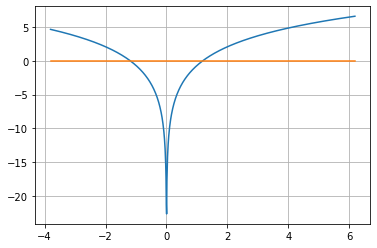

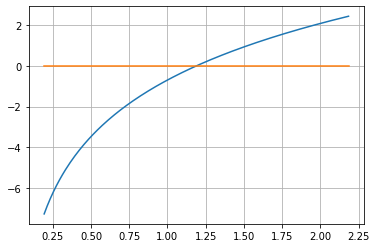

   xlow       xup      xmid       rae   f(xlow)   f(xmid)
0   0.5  2.000000  1.439354           -3.472589  0.756777
1   0.5  1.439354  1.271272  0.132216 -3.472589  0.260070
2   0.5  1.271272  1.217534  0.044137 -3.472589  0.087309
3   0.5  1.217534  1.199936  0.014666 -3.472589  0.029072
4   0.5  1.199936  1.194125  0.004866 -3.472589  0.009653


In [11]:
table = {
    'xlow': [],
    'xup': [],
    'xmid': [],
    'rae': [],
    'f(xlow)': [],
    'f(xmid)': []
}


# ====== Ganti f(x) ======
def f(x):
    return np.log(x ** 4) - 0.7


def falsePosition(xlow, xup, xmidold=9999, rae=9999, iter=0):
    xmid = xup - (f(xup)*(xlow-xup))/(f(xlow)-f(xup))
    rae = abs((xmid-xmidold)/xmid)
    f_xlow = f(xlow)
    f_xmid = f(xmid)

    table['xlow'].append(xlow)
    table['xup'].append(xup)
    table['xmid'].append(xmid)
    if iter > 0:
        table['rae'].append(rae)
    else:
        table['rae'].append('')
    table['f(xlow)'].append(f_xlow)
    table['f(xmid)'].append(f_xmid)

    if iter > 100 or rae < es:
        return xmid

    if f_xlow * f_xmid < 0:
        return falsePosition(xlow, xmid, xmid, rae, iter+1)
    elif f_xlow * f_xmid > 0:
        return falsePosition(xmid, xup, xmid, rae, iter+1)

    return xmid


# ====== Ganti Titik Awal ======
xlow = 0.5
xup = 2
es = 0.005

result = falsePosition(xlow, xup)

print(result, "\n")
showGraph(result, 5)
showGraph(result, 1)
print(pd.DataFrame(table))

# Newton Raphson Method

$x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}$

$|\epsilon_{a}| = |\frac{x_{i+1}-x_{i}}{x_{i+1}}| \cdot 100\% $

0.7141687150306106 



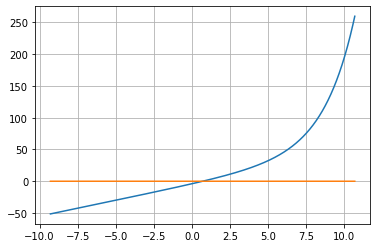

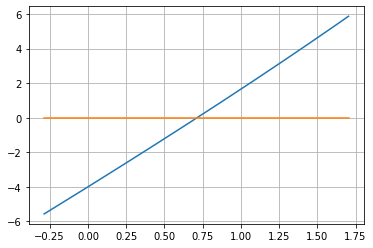

         xi       xii       rae
0  0.700000  0.714175  0.019848
1  0.714175  0.714169  0.000009


In [14]:
table = {
    'xi': [],
    'xii': [],
    'rae': []
}


# ====== Ganti f(x) ======
def f(x):
    return np.exp(0.5*x) + 5*x - 5


# ====== Ganti f'(x) ======
def fa(x):
    return 0.5*(np.exp(0.5*x)) + 5


def newtonRaphson(xi, rae=9999, iter=0):
    xii = xi - f(xi)/fa(xi)
    rae = abs((xii-xi)/xii)

    table['xi'].append(xi)
    table['xii'].append(xii)
    table['rae'].append(rae)

    if iter < 100 and rae >= es:
        return newtonRaphson(xii, rae, iter+1)

    return xii


# ====== Ganti Titik Awal ======
x0 = 0.7
es = 0.005

result = newtonRaphson(x0)

print(result, "\n")
showGraph(result, 10)
showGraph(result, 1)
print(pd.DataFrame(table))

# Secant Method

$x_{i+1} = x_{i} - \frac{f(x_{i})(x_{i-1}-x_{i})}{f(x_{i-1})-f(x_{i})}$

$|\epsilon_{a}| = |\frac{x_{i+1}-x_{i}}{x_{i+1}}| \cdot 100\% $

In [6]:
table = {
    'x': [],
    'xi': [],
    'xii': [],
    'ea': []
}


# ====== Ganti f(x) ======
def f(x):
    return np.exp(0.5*x) + 5*x - 5


def secant(x, xi, ea=9999, es=0.005, iter=0):
    xii = xi - (f(xi)*(x-xi))/(f(x)-f(xi))
    ea = abs((xii-xi)/xii)

    table['x'].append(x)
    table['xi'].append(xi)
    table['xii'].append(xii)
    table['ea'].append(ea)

    if iter < 100 and ea >= es:
        return secant(xi, xii, ea, es, iter+1)

    return xii


# ====== Ganti Titik Awal ======
x0 = 0
x1 = 2

result = secant(x0, x1)

print(result, "\n")
showGraph(result, 10)

print(pd.DataFrame(table))

0.7141701886401998 

          x        xi       xii        ea
0  0.000000  2.000000  0.682694  1.929570
1  2.000000  0.682694  0.712664  0.042054
2  0.682694  0.712664  0.714170  0.002109
